In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [3]:
def convert_rgb_to_gray(img):  
    m=img.shape[0]
    n=img.shape[1]
    img_2=np.zeros((m,n))
    for i in range(m):
        for j in range(n):
            img_2[i,j]=get_distance(img[i,j,:])
    return img_2

def get_distance(v,w=[1/3,1/3,1/3]):  
    a,b,c=v[0],v[1],v[2]
    w1,w2,w3=w[0],w[1],w[2]
    d=((a**2)*w1 +
      (b**2)*w2 +
      (c**2)*w3)**.5
    return d

In [5]:
def get_default_mask_for_mean():  #3x3 matris
    return np.array([1,1,1,1,1,1,1,1,1]).reshape(3,3)/9

def apply_mask(part_of_img):
    mask = get_default_mask_for_mean()
    return sum(sum(part_of_img*mask))

In [10]:
block_1 = np.array([1,1,1,1,1,1,1,1,1]).reshape(3,3)/9
block_1

array([[0.11111111, 0.11111111, 0.11111111],
       [0.11111111, 0.11111111, 0.11111111],
       [0.11111111, 0.11111111, 0.11111111]])

In [11]:
sum(block_1)

array([0.33333333, 0.33333333, 0.33333333])

In [12]:
sum(sum(block_1))

1.0

(<matplotlib.axes._subplots.AxesSubplot at 0x7fd2fd7963a0>,
 <matplotlib.image.AxesImage at 0x7fd2fccc8d90>)

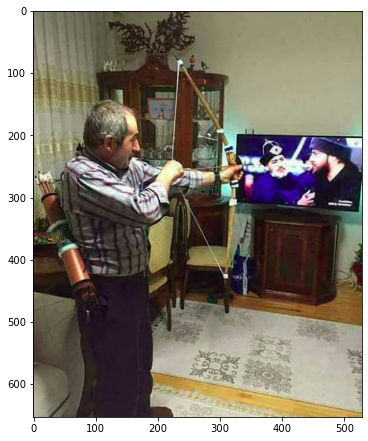

In [13]:
img_1 = mpimg.imread('resim.jpg')
img_2 = convert_rgb_to_gray(img_1)
%matplotlib inline
plt.figure(figsize=(20,20))
plt.subplot(1,3,1),plt.imshow(img_1)

In [14]:
def get_median_for_55(poi):
    s1 = poi.reshape(1,25) 
    s1.sort()
    return s1[0,13]

def get_median(poi): 
    s1 = poi.reshape(1,9)
    s1.sort() 
    return s1[0,4]

def get_mean_filter_for_55(im_1):
    m = im_1.shape[0]
    n = im_1.shape[1]
    im_2 = np.zeros((m,n))
    
    for i in range (3,m-3):
        for j in range (3,n-3):
            poi = im_1[i-2:i+3,j-2:j+3]
            im_2[i,j] = get_median_for_55(poi)
    return im_2

def get_mean_filter(im_1):
    m = im_1.shape[0]
    n = im_1.shape[1]
    im_2 = np.zeros((m,n))
    
    for i in range (1,m-1):
        for j in range (1,n-1):
            poi = im_1[i-1:i+2,j-1:j+2]
            im_2[i,j] = get_median(poi)
    return im_2

In [15]:
apply_mask(img_2[1:4,1:4])

123.91532132041057

In [16]:
img_55 = get_mean_filter_for_55(img_2)

(<matplotlib.axes._subplots.AxesSubplot at 0x7fd2fc440430>,
 <matplotlib.image.AxesImage at 0x7fd2fcc548b0>)

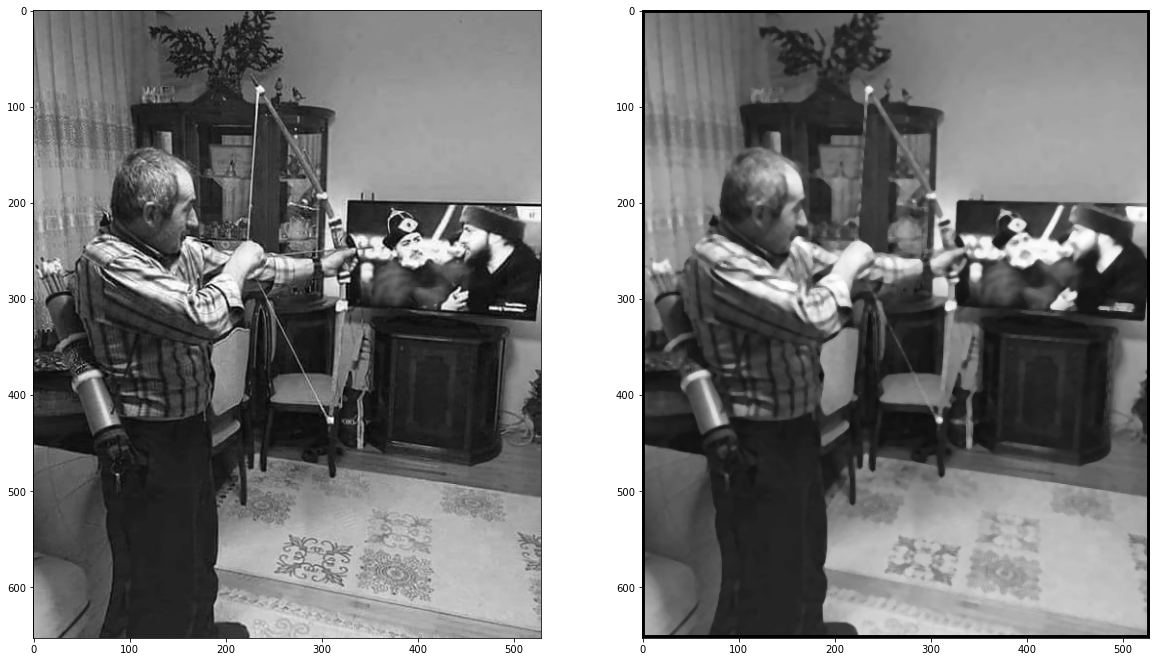

In [17]:
plt.figure(figsize=(20,20))
plt.subplot(1,2,1),plt.imshow(img_2, cmap = 'gray')
plt.subplot(1,2,2),plt.imshow(img_55, cmap = 'gray')